# Read the configuration files

## Create the crowd object

In [2]:
from pathlib import Path
import configuration.backup.dict_to_xml_and_reverse as fun_xml
from configuration.models.crowd import create_agents_from_dynamic_static_geometry_parameters

# Open the configuration files, read them, and convert them to dictionaries
config_files_folder_path = Path.cwd().parent.parent.parent / "data" / "xml" / "crowd_ANSURII_tutorial"

with open(config_files_folder_path / "Agents.xml", encoding="utf-8") as f:
    crowd_xml = f.read()
static_dict = fun_xml.static_xml_to_dict(crowd_xml)

with open(config_files_folder_path / "Geometry.xml", encoding="utf-8") as f:
    geometry_xml = f.read()
geometry_dict = fun_xml.geometry_xml_to_dict(geometry_xml)

with open(config_files_folder_path / "AgentDynamics.xml", encoding="utf-8") as f:
    dynamic_xml = f.read()
dynamic_dict = fun_xml.dynamic_xml_to_dict(dynamic_xml)

# Create the Crowd object and populate it with the data from the dictionaries
crowd = create_agents_from_dynamic_static_geometry_parameters(
    static_dict=static_dict,
    dynamic_dict=dynamic_dict,
    geometry_dict=geometry_dict,
)

## Display the crowd

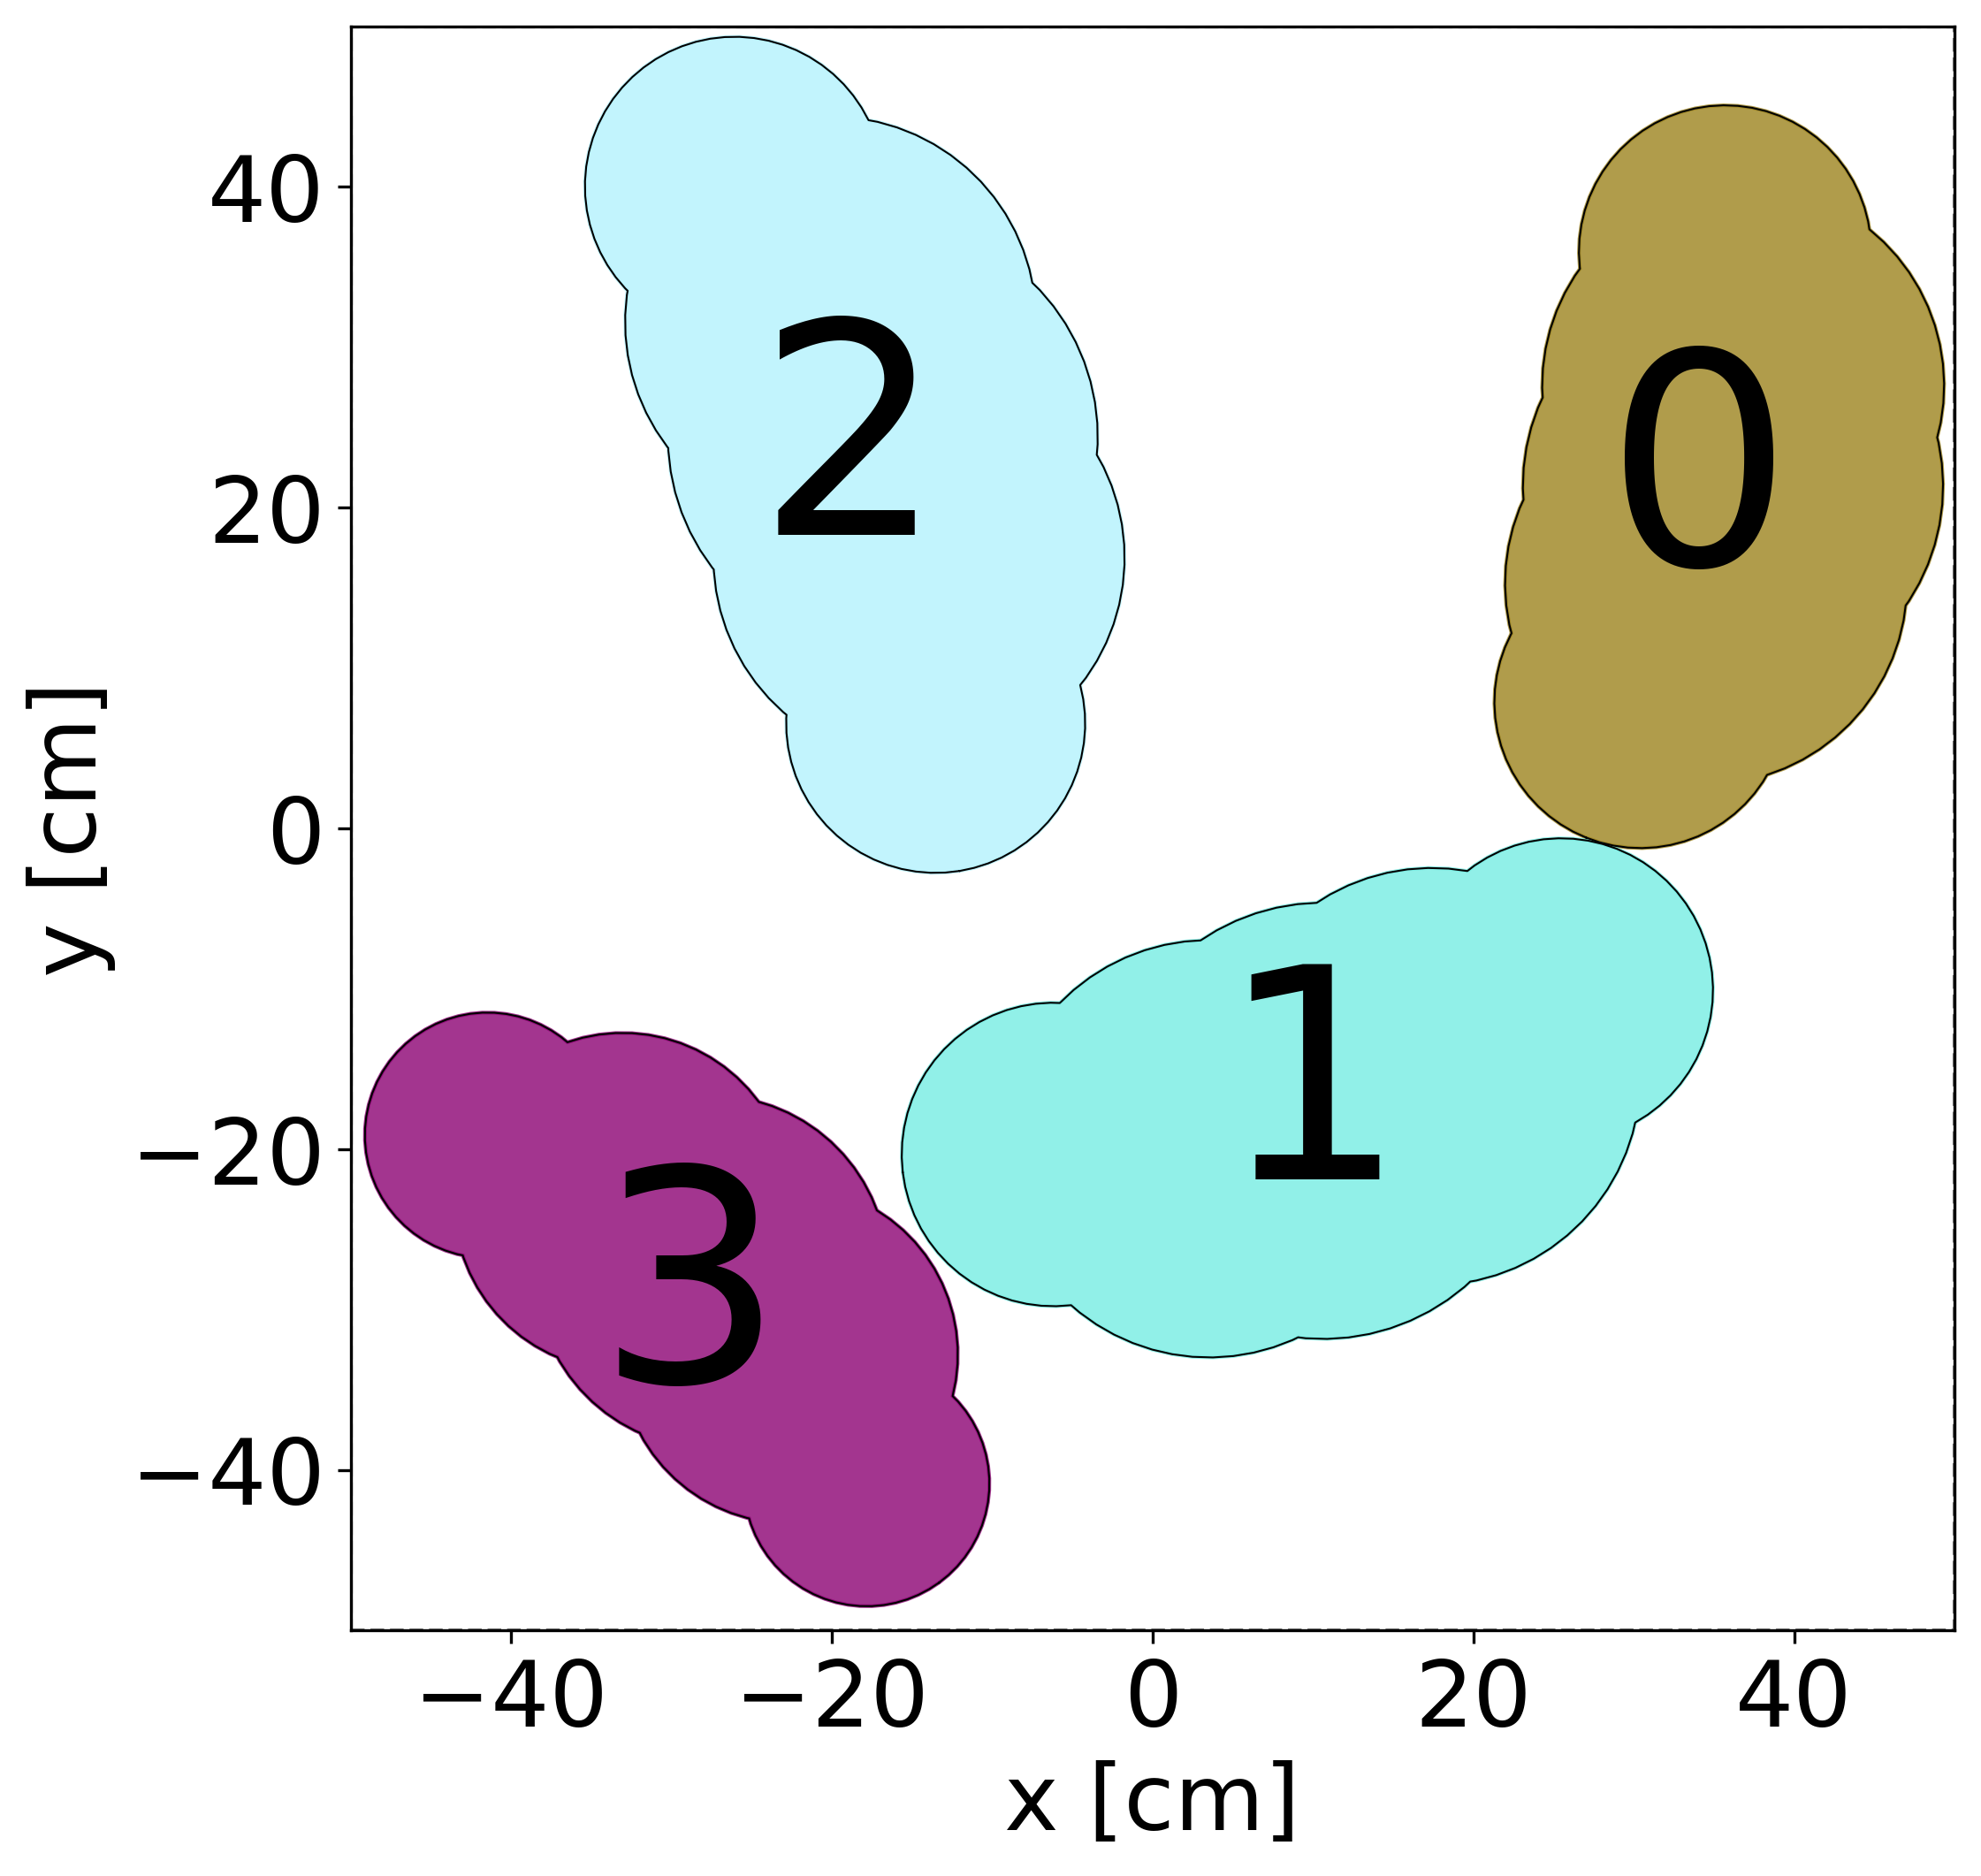

In [3]:
from streamlit_app.plot import plot
import matplotlib.pyplot as plt

plot.display_crowd2D(crowd)
plt.show()

## Get some anthropometric statistics from the created crowd

In [4]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'male_bideltoid_breadth_max': 54.39999999999999,
 'male_bideltoid_breadth_mean': 50.199999999999996,
 'male_bideltoid_breadth_min': 46.8,
 'male_bideltoid_breadth_std_dev': 3.6986484017813828,
 'male_chest_depth_max': 27.200000000000003,
 'male_chest_depth_mean': 25.55,
 'male_chest_depth_min': 22.0,
 'male_chest_depth_std_dev': 2.402082429892864,
 'male_proportion': 1.0,
 'pedestrian_proportion': 1.0,
 'pedestrian_weight_max': 70.0,
 'pedestrian_weight_mean': 70.0,
 'pedestrian_weight_min': 70.0,
 'pedestrian_weight_std_dev': 0.0}


In [5]:
# Print the numbers observables
pprint.pprint(crowd_statistics["stats_counts"])

{'bike_number': 0, 'male_number': 4, 'pedestrian_number': 4}


In [6]:
# Print the detailed distribution of the other observables
pprint.pprint(crowd_statistics["stats_lists"])

{'bike_weight': [],
 'female_bideltoid_breadth': [],
 'female_chest_depth': [],
 'handlebar_length': [],
 'male_bideltoid_breadth': [46.8, 52.2, 54.39999999999999, 47.400000000000006],
 'male_chest_depth': [26.200000000000003, 27.200000000000003, 26.8, 22.0],
 'pedestrian_weight': [70.0, 70.0, 70.0, 70.0],
 'top_tube_length': [],
 'total_length': [],
 'wheel_width': []}
